# Drive Mount & Directory

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')
data_directory = os.path.abspath("/content/drive/MyDrive/ResearchPanda/Data")
if not os.path.exists(data_directory):
    print("Data directory does not exist.")
else:
    print("Data directory exists.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data directory exists.


# Directory Structure


In [3]:
for root, dirs, files in os.walk(data_directory):
    level = root.replace(data_directory, '').count(os.sep)
    indent = ' ' * 2 * level
    print('{}{}/'.format(indent, os.path.basename(root)))

Data/
  samples/
  labels/


# Data visualization

In [4]:
# Get the paths of the first 8 labels and 8 images
sample_dir = os.path.join(data_directory, 'samples')
label_dir = os.path.join(data_directory, 'labels')

sample_files = sorted([os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if os.path.isfile(os.path.join(sample_dir, f))])
label_files = sorted([os.path.join(label_dir, f) for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))])

first_8_samples = sample_files[:8]
first_8_labels = label_files[:8]

print("First 8 sample paths:")
for s in first_8_samples:
    print(s)

print("\nFirst 8 label paths:")
for l in first_8_labels:
    print(l)

First 8 sample paths:
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_1.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_10.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_100.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_101.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_102.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_103.tiff
/content/drive/MyDrive/ResearchPanda/Data/samples/S2A_MSIL2A_20171025T150721_N05

In [5]:
# data visualisation using matplotlib and OpenCV
# ref: https://www.kaggle.com/code/yassinealouini/working-with-tiff-files
from matplotlib import pyplot as plt
import cv2

for sample_path, label_path in zip(first_8_samples, first_8_labels):
    cv2_sample = cv2.imread(sample_path)
    cv2_label = cv2.imread(label_path)

    if cv2_sample is not None and cv2_label is not None:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2_sample)
        plt.title('Sample Image')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2_label)
        plt.title('Label Image')
        plt.show()
    else:
        print(f"Could not read image files: {sample_path} or {label_path}")

Output hidden; open in https://colab.research.google.com to view.

# Data Manipulation

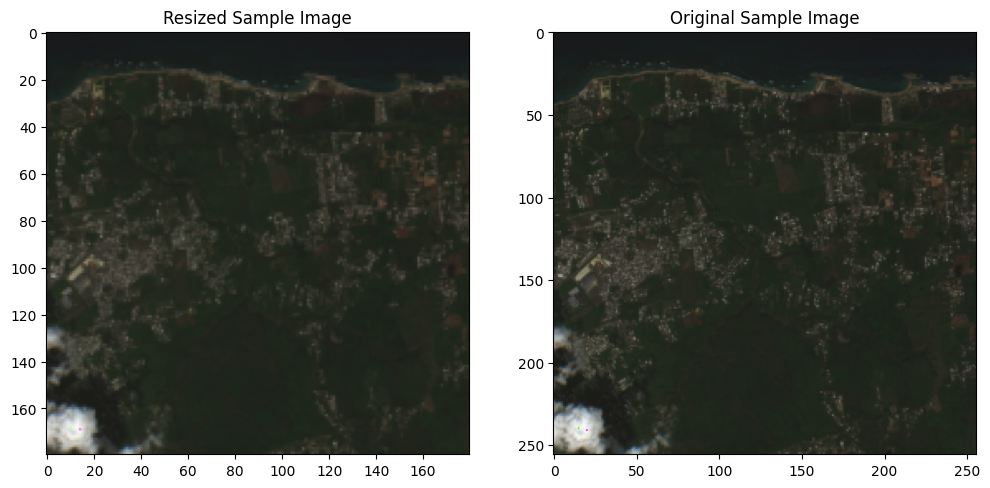

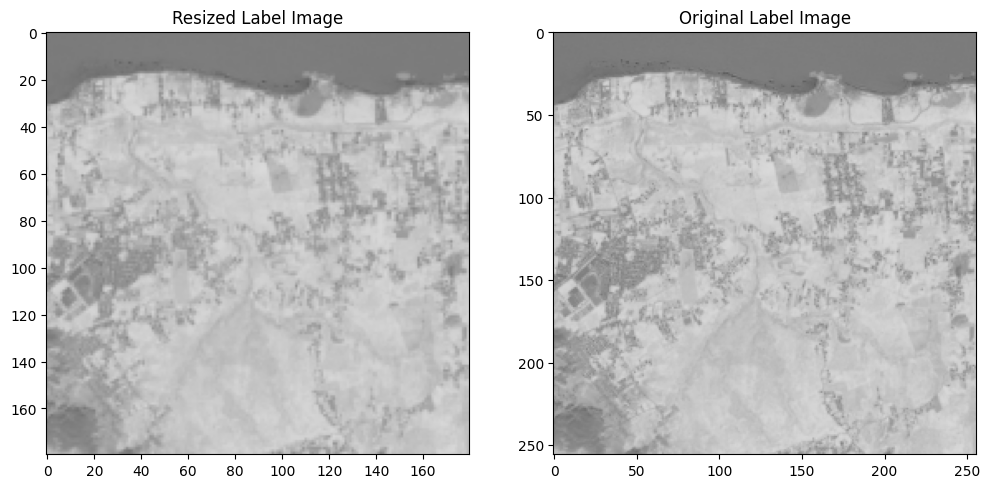

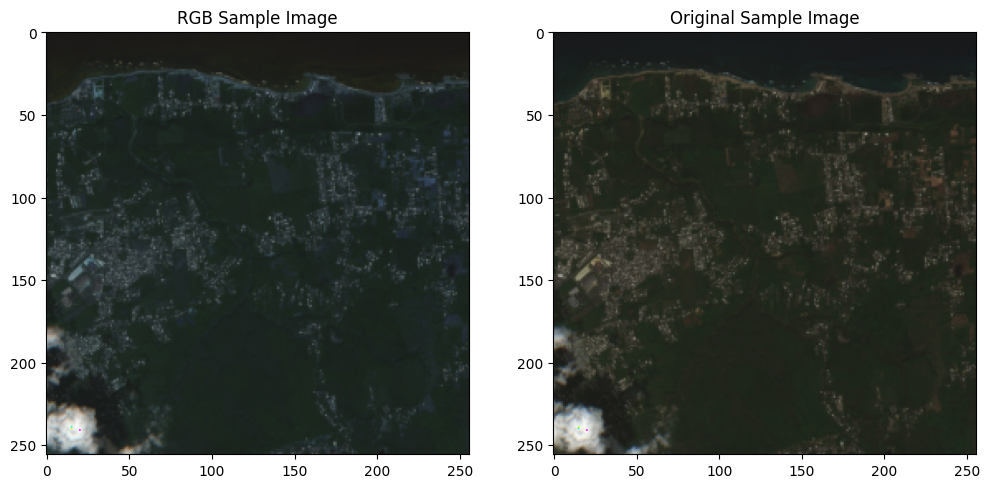

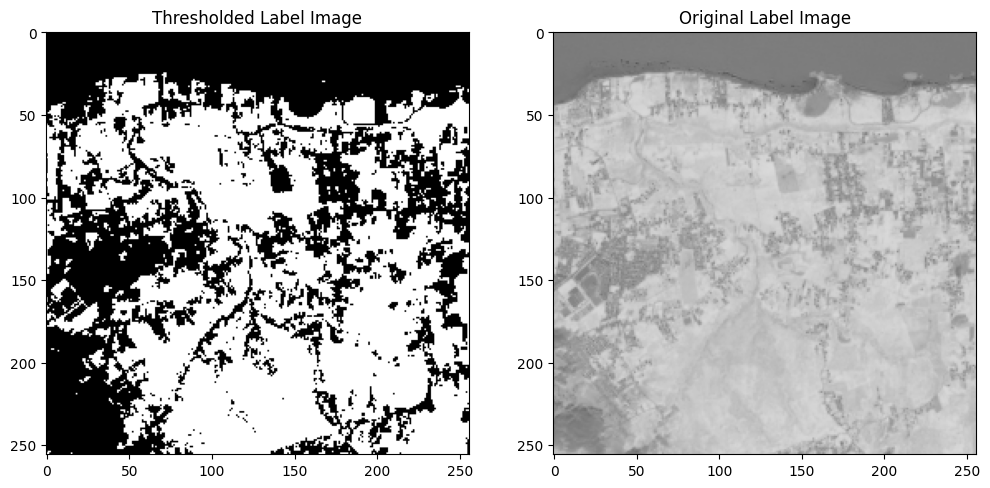

In [6]:
# Data Manipulation Examples
# Using the first sample and label images

if first_8_samples and first_8_labels:
    first_sample_path = first_8_samples[0]
    first_label_path = first_8_labels[0]

    sample_img = cv2.imread(first_sample_path)
    label_img = cv2.imread(first_label_path)

    if sample_img is not None and label_img is not None:
        # Example 1: Resizing the images
        resized_sample = cv2.resize(sample_img, (180, 180))
        resized_label = cv2.resize(label_img, (180, 180))

        # Sample image
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(resized_sample)
        plt.title('Resized Sample Image')
        plt.subplot(1, 2, 2)
        plt.imshow(sample_img)
        plt.title('Original Sample Image')
        plt.show()

        # Label image
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(resized_label)
        plt.title('Resized Label Image')
        plt.subplot(1, 2, 2)
        plt.imshow(label_img)
        plt.title('Original Label Image')
        plt.show()


        # Example 2: Converting to RGB (for sample image)
        rgb_sample = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(rgb_sample)
        plt.title('RGB Sample Image')
        plt.subplot(1, 2, 2)
        plt.imshow(sample_img)
        plt.title('Original Sample Image')
        plt.show()

        # Example 3: Applying a simple binary threshold (for label image)
        ret, thresh_label = cv2.threshold(label_img, 188, 255, cv2.THRESH_BINARY)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(thresh_label, cmap='gray')
        plt.title('Thresholded Label Image')
        plt.subplot(1, 2, 2)
        plt.imshow(label_img, cmap='gray')
        plt.title('Original Label Image')
        plt.show()

    else:
        print("Could not read the first sample or label image.")
else:
    print("No sample or label files found in the specified directories.")

In [10]:
! pip install rasterio

In [21]:
import rasterio

if first_8_samples and first_8_labels:
    first_sample_path = first_8_samples[0]
    first_label_path = first_8_labels[0]

    with rasterio.open(first_sample_path) as src:
        sample_data = src.read().flatten()
        sample_profile = src.profile
        sample_transform = src.transform


    with rasterio.open(first_label_path) as src:
        label_data = src.read().flatten()
        label_profile = src.profile
        label_transform = src.transform


    print("Sample Data Type:", sample_data.dtype)
    print("Sample Data Shape:", sample_data.shape)
    print("Sample Profile:", sample_profile)
    print("Sample Transform:\n", sample_transform)
    print(f"NDVI range: {sample_data.min():.3f} to {sample_data.max():.3f}")

    print("\nLabel Data Type:", label_data.dtype)
    print("Label Data Shape:", label_data.shape)
    print("Label Profile:", label_profile)
    print("Label Transform:\n", label_transform)
    print(f"NDVI range: {label_data.min():.3f} to {label_data.max():.3f}")

Sample Data Type: uint8
Sample Data Shape: (196608,)
Sample Profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 256, 'height': 256, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 256, 'blockysize': 10, 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}
Sample Transform:
 | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
NDVI range: 0.000 to 254.000

Label Data Type: uint8
Label Data Shape: (65536,)
Label Profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 256, 'height': 256, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 256, 'blockysize': 32, 'tiled': False, 'interleave': 'band'}
Label Transform:
 | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
NDVI range: 86.000 to 219.000


/usr/local/lib/python3.12/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
